### Week 5 <br> Hotaling, Michael <br> 2020-09-28

### Exercise 5-1
In the BRFSS (seee "The lognormal Distribution" on page 56), the distribution of heights is roughly normal with parameters $\mu$ = 178cm and $\sigma$ = 7.7cm for men and  $\mu$ = 163cm and $\sigma$ = 7.3cm for women <br> In order to join [*Blue Man Group*](http://bluemancasting.com), you have to be male and between 5'10" and 6'1" tall. What percentage of the US male population is in this range?


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import math

### Analytical Approach

In [2]:
def feet_to_cm(measurement):
    lst = measurement.split("'")
    length = 0
    try:
        length += (int(lst[0]) * 30.48)

        length += int(lst[1]) * 2.54
    except:
        pass
    return length

min_height = "5'10"
max_height = "6'1"

min_height = feet_to_cm(min_height)
max_height = feet_to_cm(max_height)
print("Min height is",min_height,"cm")
print("Max height is",max_height, "cm")

Min height is 177.8 cm
Max height is 185.42 cm


In [3]:
avg_height = 178
std_height = 7.7
distribution = ss.norm(loc=avg_height, scale=std_height)

In [4]:
up_to_min = distribution.cdf(min_height)
up_to_max = distribution.cdf(max_height)

pop_in_range = (up_to_max - up_to_min) * 100
print("The percentage of the US male population between",min_height,"cm and",max_height,"cm is",round(pop_in_range,4),"%")

The percentage of the US male population between 177.8 cm and 185.42 cm is 34.2747 %


### Simulated Approach

In [5]:
heights = np.random.normal(loc = avg_height, scale = std_height, size = 1 * (10 ** 7))

'''
I've always been told arrays are much faster, so maybe I'm using them incorrectly. This can barely run 

in_range = np.array([])
in_range_bins = np.array([])

for i in heights:
    if min_height < i < max_height:
        in_range = np.append(in_range,1)
        in_range_bins = np.append(in_range_bins,i)
    else:
        in_range = np.append(in_range,0)

'''

in_range = []
in_range_bins = []

for i in heights:
    if min_height < i < max_height:
        in_range.append(1)
        in_range_bins.append(i)
    else:
        in_range.append(0)
        
        
num_of_bins = 500

bins = np.linspace(140,220, num_of_bins + 1 )

heights_binned = pd.cut(heights,bins).value_counts()
in_range_binned =pd.cut(in_range_bins, bins).value_counts()

heights_prob = heights_binned/heights_binned.sum()
in_range_prob = in_range_binned/heights_binned.sum()

percent_in_range = (sum(in_range)/len(heights)) * 100

print("\nThe percentage of the US male population between",min_height,"cm and",max_height,"cm is",round(percent_in_range,4),"%")


The percentage of the US male population between 177.8 cm and 185.42 cm is 34.2788 %


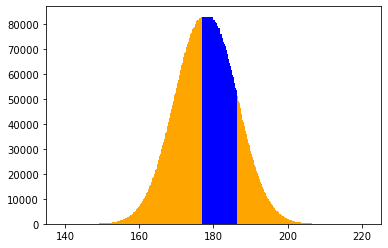

In [6]:
plt.bar(x = np.linspace(140,220, num_of_bins), height = heights_binned, width = 2, color = 'orange');
plt.bar(x = np.linspace(140,220, num_of_bins), height = in_range_binned, width = 2, color = 'blue');

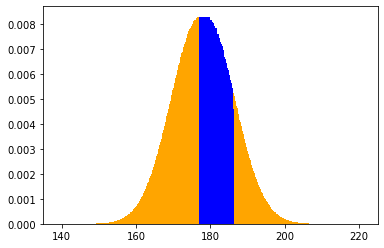

In [7]:
plt.bar(x = np.linspace(140,220, num_of_bins), height = heights_prob, width = 2, color = 'orange')
plt.bar(x = np.linspace(140,220, num_of_bins), height = in_range_prob, width = 2, color = 'blue');

### Exercise 5-2
To get a feel for the Pareto distribution, let's see how different the world would be if the distribution of heights were Pareto. With the parameters $x_m$ = 1 m and $\alpha$ = 1.7, we get a distribution with a reasonable minimum, 1 m and median 1.5 m. <br>
<br>
**Plot this distribution**.    

### Mathematical Approach

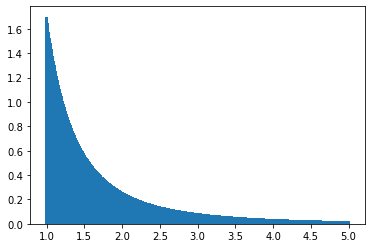

In [8]:
x_min = 1
alpha = 1.7

pareto_dist = ss.pareto(b=alpha, scale=x_min)

samples = np.linspace(1,5,1000)
output = pareto_dist.pdf(samples)
plt.bar(x = samples, height = output, width = 0.03);

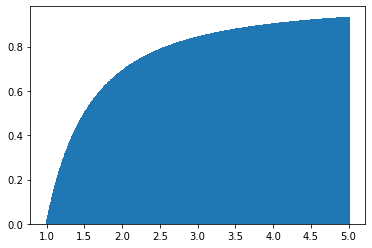

In [9]:
output = pareto_dist.cdf(samples)
plt.bar(x = samples, height = output, width = 0.03);

What is the mean human height in Pareto world?

In [10]:
pareto_dist.mean()

2.428571428571429

What fraction of the population is shorter than the mean?

In [11]:
pareto_dist.cdf(pareto_dist.mean())

0.778739697565288

If there are 7 billion people in Pareto world, how many people do we expect to be taller than 1 km.

In [12]:
round((1 - pareto_dist.cdf(1000)) * (7 * (10 ** 9)))

55603

How tall do we expect the tallest person to be?

In [13]:
pareto_dist.ppf(1 - 1/(7 * (10 ** 9)))

618349.6106759505

### Simulation Approach

In [14]:
max_height = 0
avg_height = 0

# Due to memory constraints, I need to run the code below 70 times to simulate 7B people

for i in range(1,71):
    par = np.random.pareto(a = alpha, size = 1 * (10 ** 8))  + x_min
    local_mean = np.mean(par)
    avg_height += local_mean
    local_max = np.max(par)
    if local_max > max_height:
        max_height = local_max
avg_height /= 70

In [15]:
print("Average height in Pareto World is",avg_height)
print("Median height in Pareto World is",np.median(par))
print("Minimum height in Pareto World is",np.min(par))
print("The tallest person in Pareto World is ",max_height,"meters tall")

Average height in Pareto World is 2.4284692598121302
Median height in Pareto World is 1.5033126482075698
Minimum height in Pareto World is 1.000000000252944
The tallest person in Pareto World is  409057.1108080779 meters tall


### Exercise 6-1
The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income 'Under \\$5000.'The highest range includes respondents who made '\\$250,000 or more'.

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.

In [16]:
import hinc
import hinc2

We will first import the data using the ThinkStats function ReadData in hinc.

In [17]:
income_df = hinc.ReadData(filename='hinc06.csv')

We can check the data structure using head and tail

In [18]:
print(income_df.head(5))
print(income_df.tail(5))
income_df.info()

    income  freq  cumsum        ps
0   4999.0  4204    4204  0.034330
1   9999.0  4729    8933  0.072947
2  14999.0  6982   15915  0.129963
3  19999.0  7157   23072  0.188407
4  24999.0  7131   30203  0.246640
      income  freq  cumsum        ps
37  189999.0   364  116188  0.948799
38  194999.0   432  116620  0.952327
39  199999.0   378  116998  0.955413
40  249999.0  2549  119547  0.976229
41       inf  2911  122458  1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  42 non-null     float64
 1   freq    42 non-null     int64  
 2   cumsum  42 non-null     int64  
 3   ps      42 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


We can experiment with the data a little before analyzing it. Let's create an array of values based on the income and frequency. Since there is an "inf" value on the last row, we will exclude it for this experiment

In [19]:
split_data = []
for i, j in zip(income_df['income'].iloc[0:41], income_df['freq']):
    for k in range (1, j + 1):
        split_data.append(i)
        
incomes = np.array(split_data)

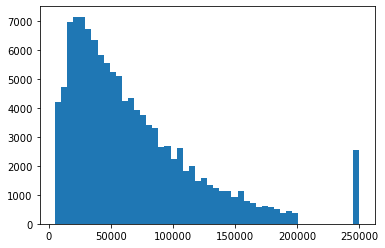

In [20]:
plt.hist(incomes, bins = 50);

In [21]:
def InterpolateSample(df, log_lower = 3.0, log_upper=6.0):
    df['log_upper'] = np.log10(df['income']) # This will take the log value of each income bracket.
    df['log_lower'] = df['log_upper'].shift(1) # This takes the log value from the previous calculation 
    df.loc[0, 'log_lower'] = log_lower # We need to establish a lower limit for the first bracket. 3 should be fine
    df.loc[41, 'log_upper'] = log_upper # Since inf is in the last column, we will need to set an arbitraty limit. We can start with 6

    # We can then take the upper and lower limit and the frequencies inside that range to create synthetic incomes. 
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row['log_lower'], row['log_upper'], int(row['freq']))
        arrays.append(vals)

    log_sample = np.concatenate(arrays)
    return log_sample

This returns an array of log based incomes. We can check the min and max incomes by putting them in our power function. In this simulated universe, the largest income is $1M. This is easily seen when plotting the data in a histogram

In [22]:
def log_to_income(log_income):
    return 10 ** log_income

In [23]:
log_sample = InterpolateSample(income_df, log_upper=6.0)
log_sample

array([3.        , 3.00016628, 3.00033256, ..., 5.99958621, 5.99979311,
       6.        ])

In [24]:
print(log_to_income(log_sample).min())
print(log_to_income(log_sample).max())

1000.0
1000000.0


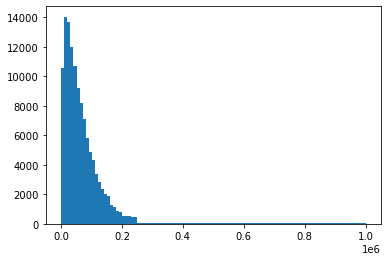

In [25]:
plt.hist(log_to_income(log_sample), bins = 100);

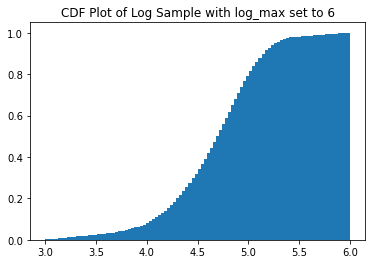

In [26]:
plt.hist(log_sample, bins = 100, cumulative=True, density = True);
plt.title("CDF Plot of Log Sample with log_max set to 6");

**Compute the median**

In [27]:
normalized_incomes = log_to_income(log_sample)

In [28]:
print("Income Median: ${:,.2f}".format(np.median(normalized_incomes)))

Income Median: $51,226.93


**Compute the mean**

In [29]:
print("Income Mean: ${:,.2f}".format(np.mean(normalized_incomes)))

Income Mean: $74,278.71


**Compute the skewness**

In [30]:
print("Calculated Skew: {:.4f}".format(ss.skew(normalized_incomes)))

Calculated Skew: 4.9499


**Compute the Pearson's skewness** 

In [31]:
def pearson_median_skew(array):
    median = np.median(array)
    mean = np.mean(array)
    std = np.std(array)
    pms = 3 * (mean - median) / std
    return pms

In [32]:
print("Pearson Median Skewness: {:.4f}".format(pearson_median_skew(normalized_incomes)))

Pearson Median Skewness: 0.7361


**What fraction of households reports a taxable income below the mean?**

In [33]:
income_mean = np.mean(normalized_incomes)

lower_than_mean = []
for i in normalized_incomes:
    if i < income_mean:
        lower_than_mean.append(i)
        
print("Percentage of Households under National Average: {:.2f}%".format(100 * (len(lower_than_mean) / len(normalized_incomes))))

Percentage of Households under National Average: 66.00%


**How do the results depend on the assumed upper bound?**

In [34]:
mean_measurements = []
median_measurements = []
skew_measurements = []
pearson_measurements = []

upper_range = 11
range_list = np.linspace(5,upper_range,50)

for i in range_list:
    log_sample = InterpolateSample(income_df, log_upper=i)
    sample = log_to_income(log_sample)
    mean_measurements.append(sample.mean())
    median_measurements.append(np.median(sample))
    skew_measurements.append(ss.skew(sample))
    pearson_measurements.append(pearson_median_skew(sample))

As our upper bound increases, our mean household income raises exponentially. When the upper bound reaches 11, that means that our richest person has an income of $100B

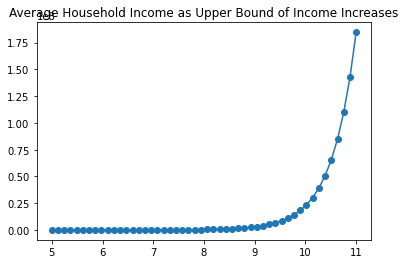

In [35]:
plt.plot(range_list,mean_measurements);
plt.scatter(range_list,mean_measurements);
plt.title("Average Household Income as Upper Bound of Income Increases");

As the upper bound increases, the median income of each household remains the same. This is expected because we aren't changing the number of households sampled, so the middle value will always remain constant

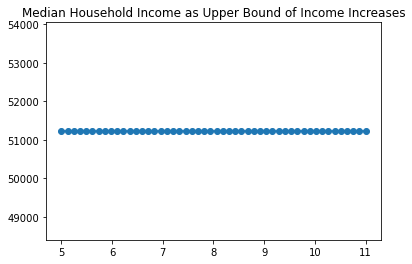

In [36]:
plt.plot(range_list,median_measurements);
plt.scatter(range_list,median_measurements);
plt.title("Median Household Income as Upper Bound of Income Increases");

As we increase the value of the top earners, the skewness increases, since the tail of our histogram gets longer and longer.

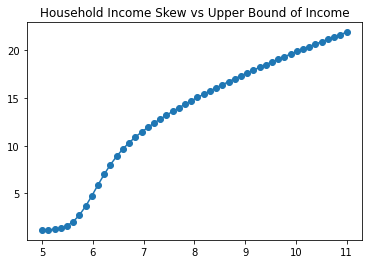

In [37]:
plt.plot(range_list,skew_measurements);
plt.scatter(range_list,skew_measurements);
plt.title("Household Income Skew vs Upper Bound of Income");

**Pearson Median Skew** <br>As the upper bound of the top income earners increases, the Pearson Median Skew somewhat unintuitively decreases. This is due to the fact that the standard deviation increases much more quickly than the household average. I plotted out what the equation looks like below to give a better understanding of what's going on inside the equation

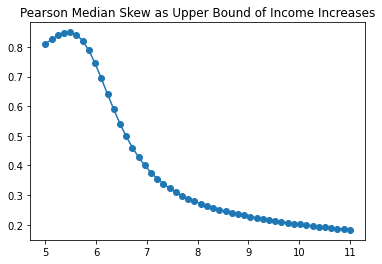

In [38]:
plt.plot(range_list,pearson_measurements);
plt.scatter(range_list,pearson_measurements);
plt.title("Pearson Median Skew as Upper Bound of Income Increases");

In [39]:
for i in np.arange(5,11):
    log_sample = InterpolateSample(income_df, log_upper=i)
    sample = log_to_income(log_sample)
    print("For log_max == {}:\n 3 * ({:.2f} - {:.2f}) / {:.2f} = {:.2f}\n"
          .format(i,np.mean(sample), 
                  np.median(sample), 
                  np.std(sample), 
                  pearson_median_skew(sample)))

For log_max == 5:
 3 * (65309.00 - 51226.93) / 52150.98 = 0.81

For log_max == 6:
 3 * (74278.71 - 51226.93) / 93946.93 = 0.74

For log_max == 7:
 3 * (124267.40 - 51226.93) / 559608.50 = 0.39

For log_max == 8:
 3 * (457453.49 - 51226.93) / 4434938.61 = 0.27

For log_max == 9:
 3 * (2929881.91 - 51226.93) / 37789632.01 = 0.23

For log_max == 10:
 3 * (22526983.87 - 51226.93) / 334705384.90 = 0.20

